In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import rescale
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_image = data.chelsea()

In [3]:
def show_images(before, after, op):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(before, cmap='gray')
    ax[0].set_title("Original image")

    ax[1].imshow(after, cmap='gray')
    ax[1].set_title(op + " image")
    if op == "Rescaled":
        ax[0].set_xlim(0, 400)
        ax[0].set_ylim(300, 0)
    else:        
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()

## Rescale image

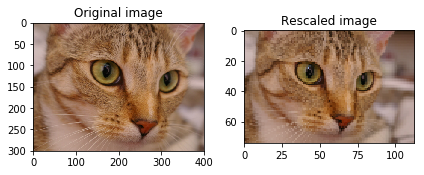

In [4]:
# rescale image to 25% of the initial size
image_rescaled = rescale(original_image, 1.0 / 4.0)

show_images(original_image, image_rescaled, "Rescaled")

## Add random noise

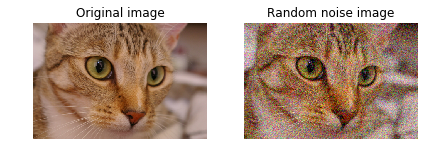

In [5]:
from skimage.util import random_noise

image_with_random_noise = random_noise(original_image)

show_images(original_image, image_with_random_noise, "Random noise")

## Conver to gray scale

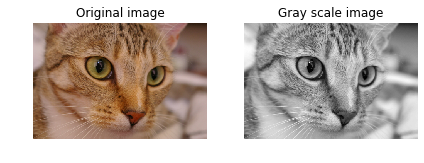

In [6]:
from skimage.color import rgb2gray

gray_scale_image = rgb2gray(original_image)

show_images(original_image, gray_scale_image, "Gray scale")

## Image color inversion

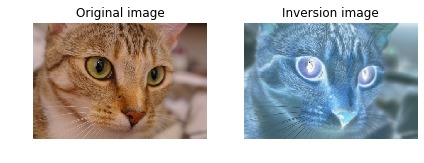

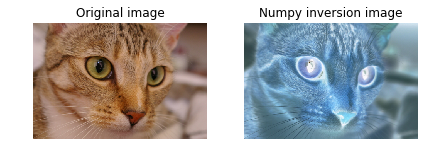

In [7]:
from skimage import util
import numpy as np

color_inversion_image = util.invert(original_image)

show_images(original_image, color_inversion_image, "Inversion")

# NOte : this can be simply done with numpy

color_inversion_image_with_np = np.invert(original_image)

show_images(original_image, color_inversion_image_with_np, "Numpy inversion")

## Rotate image

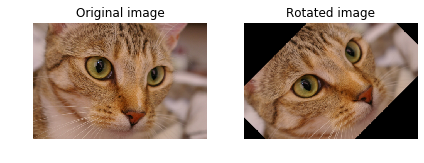

In [8]:
from skimage.transform import rotate

# perform a 45 degree rotation
image_with_rotation = rotate(original_image, 45)

show_images(original_image, image_with_rotation, "Rotated")

## Rescale intensity (change contras)

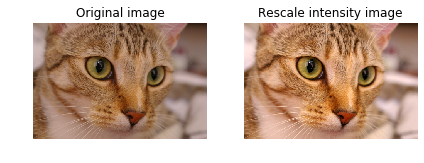

In [9]:
import numpy as np
from skimage import exposure

v_min, v_max = np.percentile(original_image, (0.2, 99.8))
better_contrast = exposure.rescale_intensity(original_image, in_range=(v_min, v_max))

show_images(original_image, better_contrast, 'Rescale intensity')

## Gamma correction

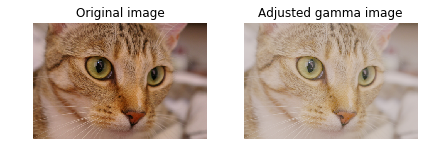

In [10]:
# gamma and gain parameters are between 0 and 1
adjusted_gamma_image = exposure.adjust_gamma(original_image, gamma=0.4, gain=0.9)

show_images(original_image, adjusted_gamma_image, 'Adjusted gamma')

## Logarithmic correction

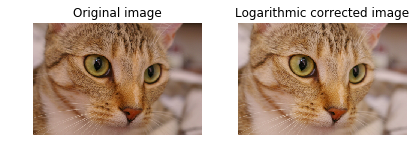

In [11]:
log_correction_image = exposure.adjust_log(original_image)

show_images(original_image, log_correction_image, 'Logarithmic corrected')

## Sigmoid correction

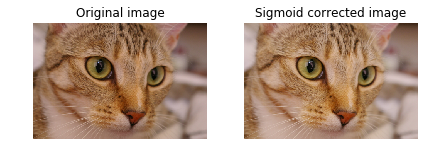

In [12]:
sigmoid_correction_image = exposure.adjust_sigmoid(original_image)

show_images(original_image, log_correction_image, 'Sigmoid corrected')

## Horizontal flip

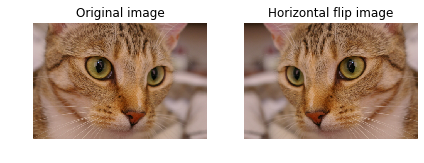

In [13]:
horizontal_flip = original_image[:, ::-1]

show_images(original_image, horizontal_flip, 'Horizontal flip')

## Vertical flip

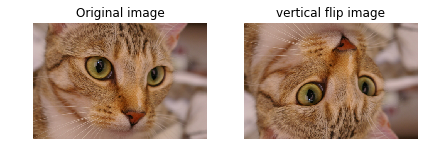

In [14]:
vertical_flip = original_image[::-1, :]

show_images(original_image, vertical_flip, 'vertical flip')

## Blur image

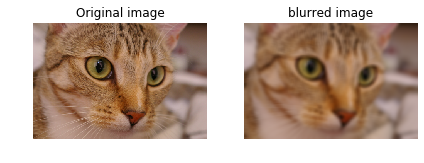

In [15]:
from scipy import ndimage

blured_image = ndimage.uniform_filter(original_image, size=(11, 11, 1))

show_images(original_image, blured_image, 'blurred')

source: https://www.kaggle.com/tomahim/image-manipulation-augmentation-with-skimage